In [62]:
## Carrying out EDA:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [63]:
data = pd.read_csv("Salary Prediction of Data Professions.csv")

In [64]:
data.shape

(2639, 13)

In [65]:
data.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.2+ KB


In [67]:
# Fixing the Data type:
data['DOJ'] = pd.to_datetime(data['DOJ'], errors='coerce')  # 'coerce' handles invalid dates by converting them to NaT (Not a Time)
data['CURRENT DATE'] = pd.to_datetime(data['CURRENT DATE'], errors='coerce')

# Saving the dataset with corrected data types
data.to_csv('dataset_corrected_types.csv', index=False)


In [68]:
data.info() #Checking the wrong data types for surety

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FIRST NAME        2639 non-null   object        
 1   LAST NAME         2637 non-null   object        
 2   SEX               2639 non-null   object        
 3   DOJ               2638 non-null   datetime64[ns]
 4   CURRENT DATE      2639 non-null   datetime64[ns]
 5   DESIGNATION       2639 non-null   object        
 6   AGE               2636 non-null   float64       
 7   SALARY            2639 non-null   int64         
 8   UNIT              2639 non-null   object        
 9   LEAVES USED       2636 non-null   float64       
 10  LEAVES REMAINING  2637 non-null   float64       
 11  RATINGS           2637 non-null   float64       
 12  PAST EXP          2639 non-null   int64         
dtypes: datetime64[ns](2), float64(4), int64(2), object(5)
memory usage: 268.2+ KB


In [69]:
#Handling missing values by imputation:

data['AGE'].fillna(data['AGE'].median(), inplace=True)
data['LEAVES USED'].fillna(data['LEAVES USED'].mean(), inplace=True)
data['LEAVES REMAINING'].fillna(data['LEAVES REMAINING'].mean(), inplace=True)
data['RATINGS'].fillna(data['RATINGS'].median(), inplace=True)

# Impute missing values for categorical columns (if any)
# Replace 'Unknown' for missing 'LAST NAME'
data['LAST NAME'].fillna('Unknown', inplace=True)

# Impute missing values for datetime columns (if any)
# For example, replace with the most common date of joining
data['DOJ'].fillna(data['DOJ'].mode().iloc[0], inplace=True)

# Save the dataset with imputed values
data.to_csv('imputed_dataset.csv', index=False)



In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FIRST NAME        2639 non-null   object        
 1   LAST NAME         2639 non-null   object        
 2   SEX               2639 non-null   object        
 3   DOJ               2639 non-null   datetime64[ns]
 4   CURRENT DATE      2639 non-null   datetime64[ns]
 5   DESIGNATION       2639 non-null   object        
 6   AGE               2639 non-null   float64       
 7   SALARY            2639 non-null   int64         
 8   UNIT              2639 non-null   object        
 9   LEAVES USED       2639 non-null   float64       
 10  LEAVES REMAINING  2639 non-null   float64       
 11  RATINGS           2639 non-null   float64       
 12  PAST EXP          2639 non-null   int64         
dtypes: datetime64[ns](2), float64(4), int64(2), object(5)
memory usage: 268.2+ KB


In [71]:
#renaming the columns to ensure a consistent naming convention

data.columns = data.columns.str.lower().str.replace(' ', '_')
data.to_csv('dataset_consistent_columns.csv', index=False)

In [72]:
#Ensuring data integrity especially in the case of AGE which is in floating point data

data['age'] = data['age'].astype('Int64')  # Convert to nullable integer
data['age'] = data['age'].abs()

In [73]:
#ensuring consistent and appropriate encoding, especially for the 'SEX' and 'UNIT' columns:
print("Unique values in 'SEX':", data['sex'].unique())
print("Unique values in 'UNIT':", data['unit'].unique())

Unique values in 'SEX': ['F' 'M']
Unique values in 'UNIT': ['Finance' 'Web' 'IT' 'Operations' 'Marketing' 'Management']


In [22]:
#Ensuring consistency in date formatsepecially for 'DOJ' and 'CURRENT DATE':
print(data.columns)


Index(['first_name', 'last_name', 'sex', 'doj', 'current_date', 'designation',
       'age', 'salary', 'unit', 'leaves_used', 'leaves_remaining', 'ratings',
       'past_exp'],
      dtype='object')


In [23]:
# Converting 'DOJ' and 'CURRENT DATE' columns to datetime type
data['doj'] = pd.to_datetime(data['doj'], errors='coerce')  # 'coerce' handles invalid dates by converting them to NaT (Not a Time)
data['current_date'] = pd.to_datetime(data['current_date'], errors='coerce')

In [24]:
print(data.columns)

Index(['first_name', 'last_name', 'sex', 'doj', 'current_date', 'designation',
       'age', 'salary', 'unit', 'leaves_used', 'leaves_remaining', 'ratings',
       'past_exp'],
      dtype='object')


In [25]:
# Checking for outliers and validating data ranges
data = data[(data['salary'] > 0) & (data['leaves_used'] >= 0) & (data['ratings'] >= 0) & (data['past_exp'] >= 0)]


In [26]:
# Summary statistics
print(data.describe())

                                 doj         current_date        age  \
count                           2639                 2639     2639.0   
mean   2013-10-28 07:26:53.793103360  2016-01-07 00:00:00  24.755589   
min              2009-01-23 00:00:00  2016-01-07 00:00:00       21.0   
25%              2013-05-05 00:00:00  2016-01-07 00:00:00       22.0   
50%              2013-12-03 00:00:00  2016-01-07 00:00:00       24.0   
75%              2014-07-06 00:00:00  2016-01-07 00:00:00       25.0   
max              2015-01-31 00:00:00  2016-01-07 00:00:00       45.0   
std                              NaN                  NaN   3.906088   

              salary  leaves_used  leaves_remaining     ratings     past_exp  
count    2639.000000  2639.000000       2639.000000  2639.00000  2639.000000  
mean    58136.678287    22.501517          7.503223     3.48579     1.566881  
min     40001.000000    15.000000          0.000000     2.00000     0.000000  
25%     43418.000000    19.000000  

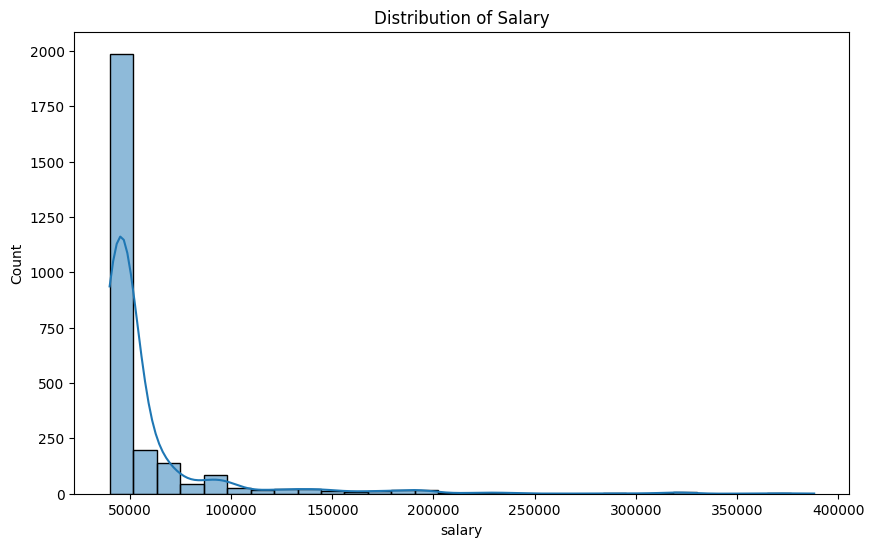

In [27]:
# VISUALIZATION

# Histogram of Salary
plt.figure(figsize=(10, 6))
sns.histplot(data['salary'], bins=30, kde=True)
plt.title('Distribution of Salary')
plt.show()


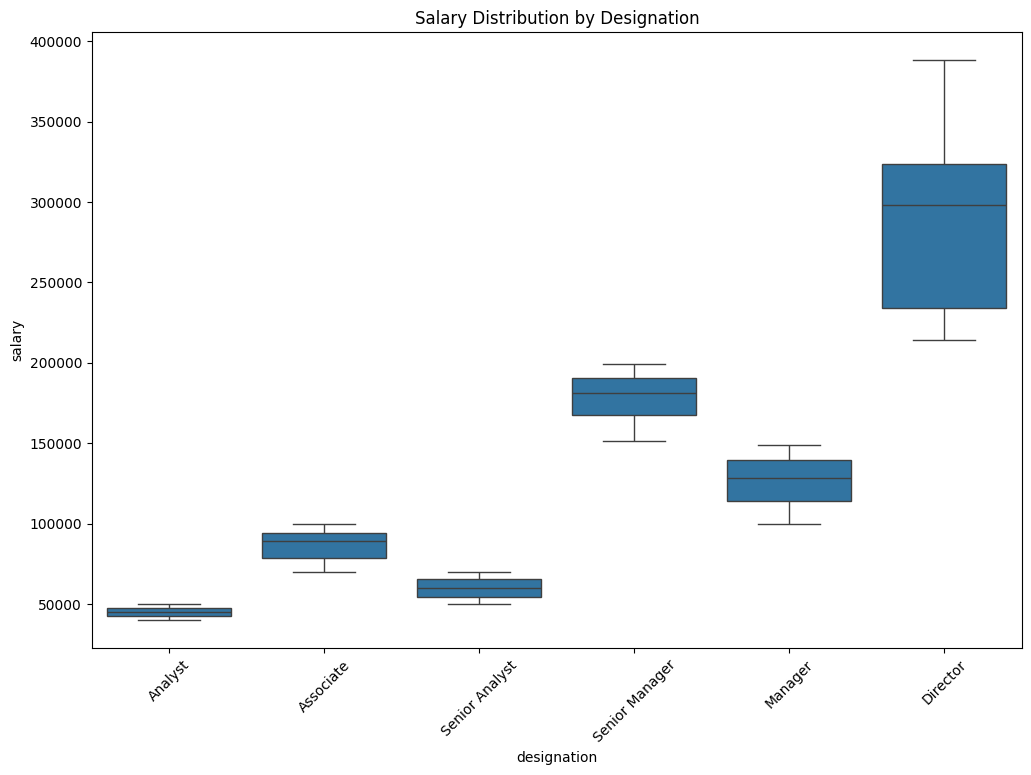

In [28]:
# BOXPLOT
plt.figure(figsize=(12, 8))
sns.boxplot(x='designation', y='salary', data=data)
plt.title('Salary Distribution by Designation')
plt.xticks(rotation=45)
plt.show()

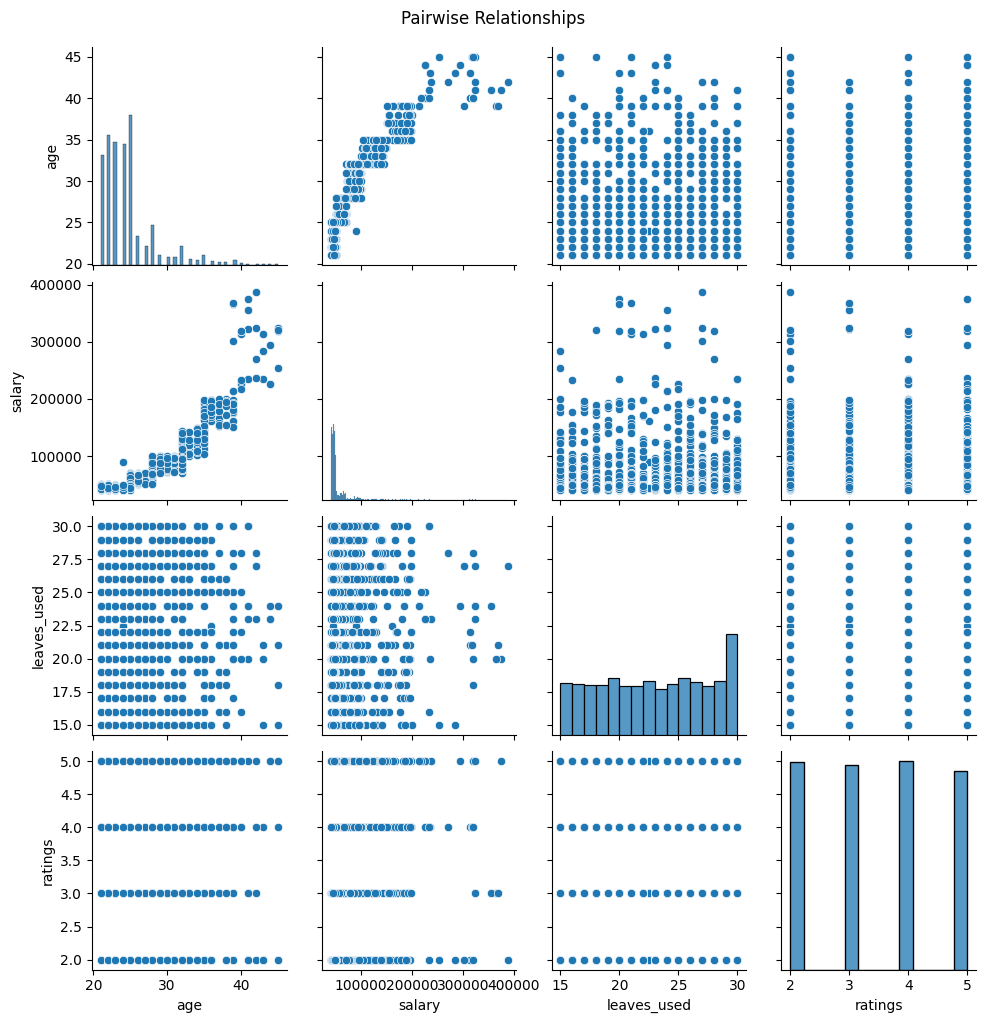

In [29]:
# Pairplot
sns.pairplot(data[['age', 'salary', 'leaves_used', 'ratings']])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()


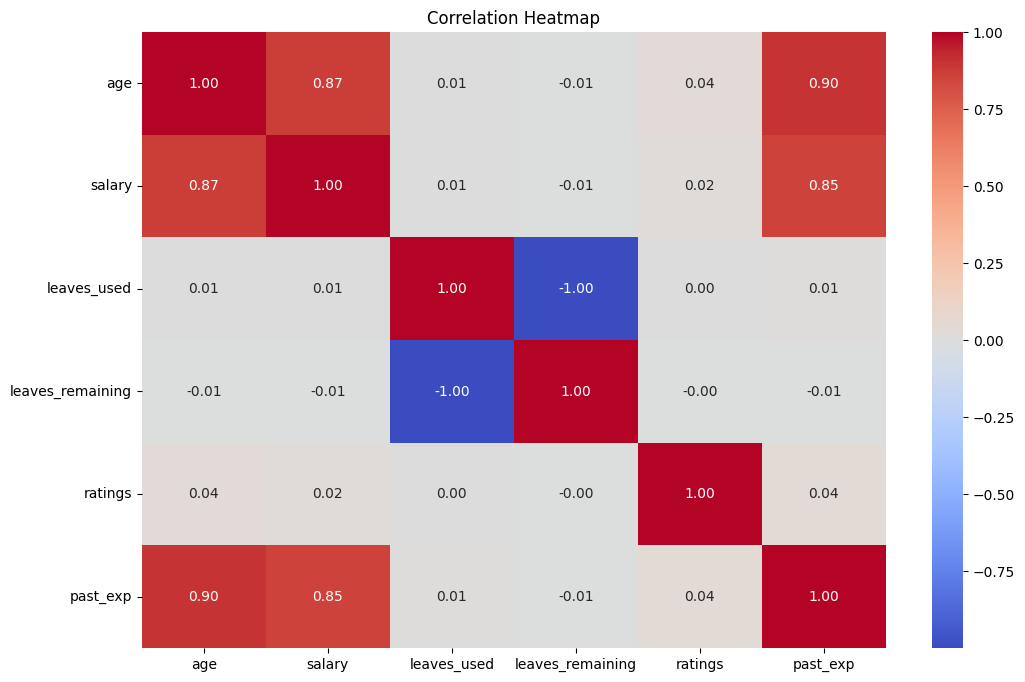

In [30]:
# Correlation Heatmap

# Excludign non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


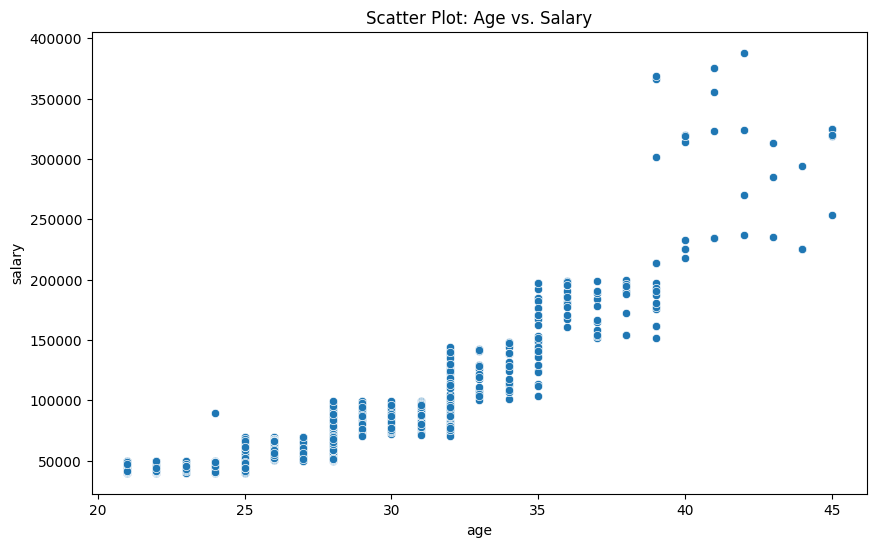

In [31]:
# Scatter Plots:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='salary', data=data)
plt.title('Scatter Plot: Age vs. Salary')
plt.show()

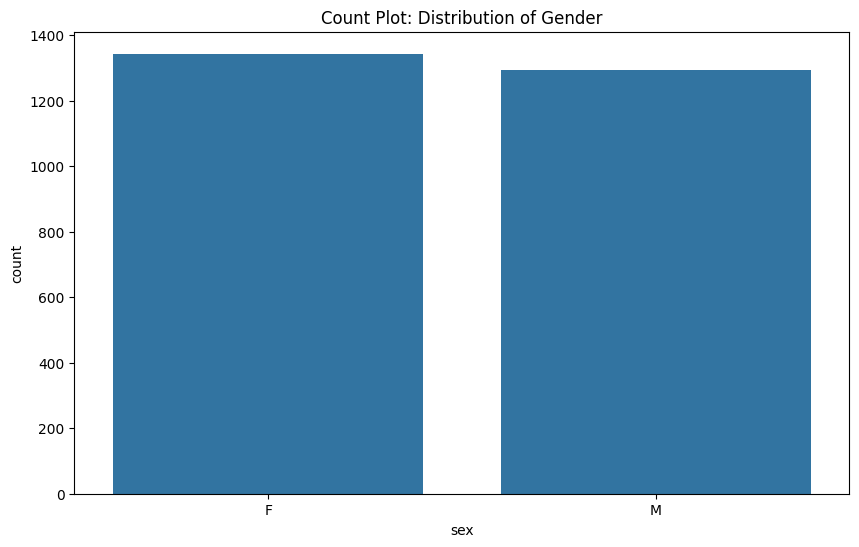

In [32]:
# Count plots

plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=data)
plt.title('Count Plot: Distribution of Gender')
plt.show()

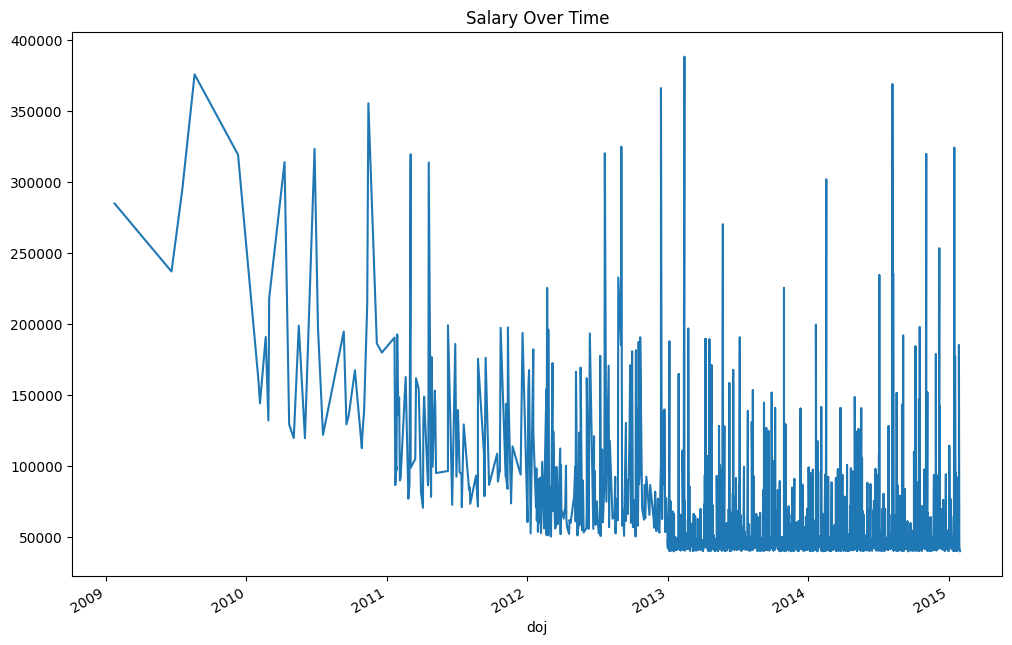

In [33]:
# Time Series Plots
data['doj'] = pd.to_datetime(data['doj'])
data.set_index('doj', inplace=True)
plt.figure(figsize=(12, 8))
data['salary'].plot()
plt.title('Salary Over Time')
plt.show()

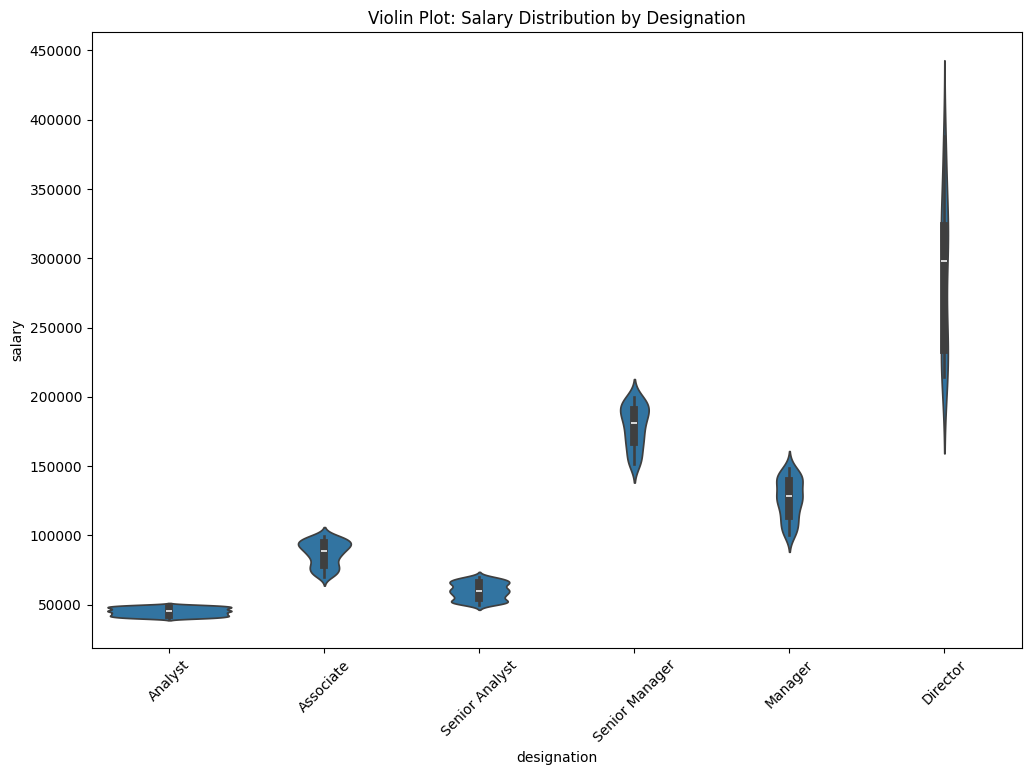

In [34]:
# Violin plots
plt.figure(figsize=(12, 8))
sns.violinplot(x='designation', y='salary', data=data)
plt.title('Violin Plot: Salary Distribution by Designation')
plt.xticks(rotation=45)
plt.show()

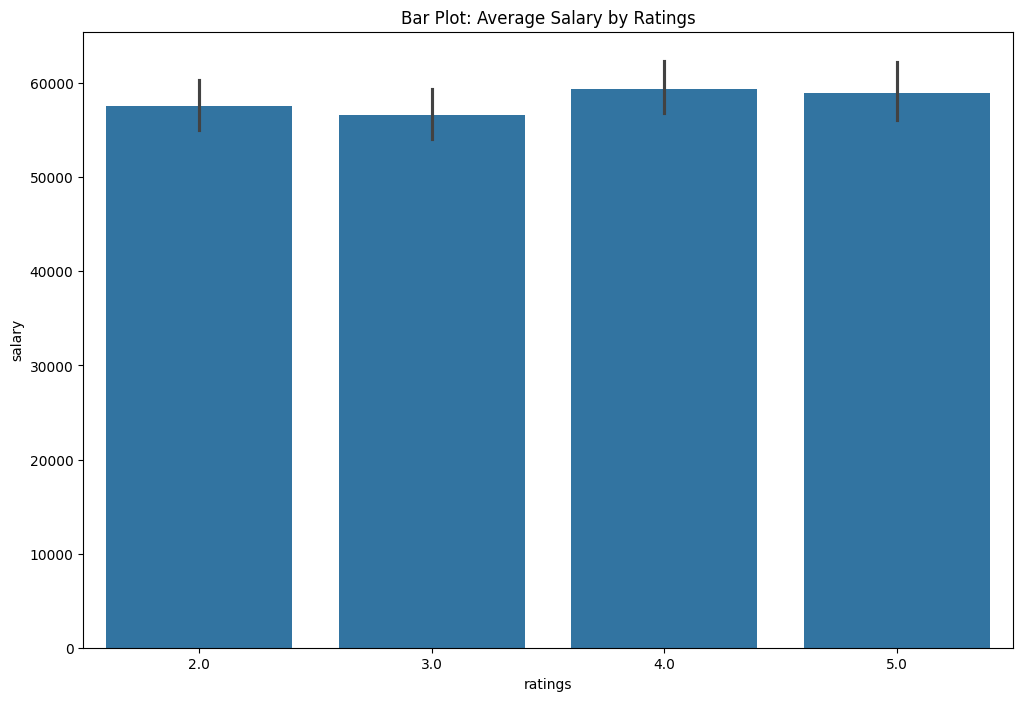

In [35]:
# Bar Plot

plt.figure(figsize=(12, 8))
sns.barplot(x='ratings', y='salary', data=data)
plt.title('Bar Plot: Average Salary by Ratings')
plt.show()

## FEATURE ENGINEERING


In [37]:
# Assuming 'PAST EXP' is already in numeric format, and no need to split
def extract_experience_years(experience):
    return experience

# Apply the function to create a new feature 'YEARS_OF_EXPERIENCE'
data['YEARS_OF_EXPERIENCE'] = data['past_exp'].apply(extract_experience_years)

# Example: Creating a feature based on performance ratings
def performance_category(rating):
    if rating >= 4.0:
        return 'High'
    elif 3.0 <= rating < 4.0:
        return 'Medium'
    else:
        return 'Low'

# Apply the function to create a new feature 'PERFORMANCE_CATEGORY'
data['PERFORMANCE_CATEGORY'] = data['ratings'].apply(performance_category)

# Example: Creating a feature based on age group
def age_group(age):
    if age < 30:
        return 'Young'
    elif 30 <= age < 40:
        return 'Mid-age'
    else:
        return 'Senior'

# Apply the function to create a new feature 'AGE_GROUP'
data['AGE_GROUP'] = data['age'].apply(age_group)

# Display the updated dataset with new features
print(data.head())



           first_name   last_name sex current_date designation  age  salary  \
doj                                                                           
2014-05-18     TOMASA       ARMEN   F   2016-01-07     Analyst   21   44570   
2013-10-19      ANNIE     Unknown   F   2016-01-07   Associate   24   89207   
2014-07-28      OLIVE        ANCY   F   2016-01-07     Analyst   21   40955   
2013-04-03     CHERRY     AQUILAR   F   2016-01-07     Analyst   22   45550   
2014-11-20       LEON  ABOULAHOUD   M   2016-01-07     Analyst   24   43161   

                  unit  leaves_used  leaves_remaining  ratings  past_exp  \
doj                                                                        
2014-05-18     Finance    24.000000               6.0      2.0         0   
2013-10-19         Web    22.501517              13.0      3.0         7   
2014-07-28     Finance    23.000000               7.0      3.0         0   
2013-04-03          IT    22.000000               8.0      3.0    

# Data Preprocessing

In [38]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values, for example, by filling them with the mean or median
data['salary'].fillna(data['salary'].median(), inplace=True)

# Drop rows with missing values in other columns (adjust as needed)
data.dropna(subset=['ratings', 'age'], inplace=True)


first_name              0
last_name               0
sex                     0
current_date            0
designation             0
age                     0
salary                  0
unit                    0
leaves_used             0
leaves_remaining        0
ratings                 0
past_exp                0
YEARS_OF_EXPERIENCE     0
PERFORMANCE_CATEGORY    0
AGE_GROUP               0
dtype: int64


In [74]:
# Scaling or Normalizing Features
from sklearn.preprocessing import StandardScaler

# Scale numerical features, for example, 'AGE' and 'LEAVES USED'
scaler = StandardScaler()
data[['age', 'leaves_used']] = scaler.fit_transform(data[['age', 'leaves_used']])


# Machine Learning Model Development

In [50]:
# TRAIN TESTING SPLIT
# Importing necessary library
from sklearn.model_selection import train_test_split

# 'salary' is the target variable
X = data[['age', 'leaves_used', 'leaves_remaining', 'ratings', 'past_exp', 'YEARS_OF_EXPERIENCE']]
y = data['salary']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the size of the train and test sets
print("Train set size:", X_train.shape, y_train.shape)
print("Test set size:", X_test.shape, y_test.shape)


# Model Training
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Initialize the regression models
linear_reg_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor()
random_forest_model = RandomForestRegressor()

# Train the models
linear_reg_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)


print("Linear Regression Model:", linear_reg_model)
print("Decision Tree Model:", decision_tree_model)
print("Random Forest Model:", random_forest_model)


Train set size: (2111, 6) (2111,)
Test set size: (528, 6) (528,)
Linear Regression Model: LinearRegression()
Decision Tree Model: DecisionTreeRegressor()
Random Forest Model: RandomForestRegressor()


In [52]:
# Model Evaluation

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions for each model on the test set
linear_reg_preds = linear_reg_model.predict(X_test)
decision_tree_preds = decision_tree_model.predict(X_test)
random_forest_preds = random_forest_model.predict(X_test)

# Evaluation for Linear Regression Model
linear_reg_mae = mean_absolute_error(y_test, linear_reg_preds)
linear_reg_mse = mean_squared_error(y_test, linear_reg_preds)
linear_reg_r2 = r2_score(y_test, linear_reg_preds)

print("Linear Regression Model Evaluation:")
print("Mean Absolute Error (MAE):", linear_reg_mae)
print("Mean Squared Error (MSE):", linear_reg_mse)
print("R-squared Score (R2):", linear_reg_r2)
print()

# Evaluation for Decision Tree Model
decision_tree_mae = mean_absolute_error(y_test, decision_tree_preds)
decision_tree_mse = mean_squared_error(y_test, decision_tree_preds)
decision_tree_r2 = r2_score(y_test, decision_tree_preds)

print("Decision Tree Model Evaluation:")
print("Mean Absolute Error (MAE):", decision_tree_mae)
print("Mean Squared Error (MSE):", decision_tree_mse)
print("R-squared Score (R2):", decision_tree_r2)
print()

# Evaluation for Random Forest Model
random_forest_mae = mean_absolute_error(y_test, random_forest_preds)
random_forest_mse = mean_squared_error(y_test, random_forest_preds)
random_forest_r2 = r2_score(y_test, random_forest_preds)

print("Random Forest Model Evaluation:")
print("Mean Absolute Error (MAE):", random_forest_mae)
print("Mean Squared Error (MSE):", random_forest_mse)
print("R-squared Score (R2):", random_forest_r2)

# MAE represents the average absolute difference between the predicted salaries and the actual salaries.
#Random Forest model has the lowest MAE, indicating that, on average, its predictions are closest to the actual salaries.

#MSE represents the average of the squared differences between the predicted salaries and the actual salaries. Like MAE, lower values of MSE indicate better performance of the model.
#Again, the Random Forest model has the lowest MSE, indicating better performance in terms of squared errors.

# R-squared is a statistical measure of how close the data are to the fitted regression line.
#It indicates the proportion of the variance in the dependent variable (salary) that is predictable from the independent variables (features).
#R-squared values range from 0 to 1. Higher values indicate better fit.
# Here, the Random Forest model has the highest R-squared score, indicating that it explains the variance in the salary data better than the other models.

Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 12484.447187034804
Mean Squared Error (MSE): 399189386.9061083
R-squared Score (R2): 0.7596022248585781

Decision Tree Model Evaluation:
Mean Absolute Error (MAE): 7057.460833032707
Mean Squared Error (MSE): 384731810.5206064
R-squared Score (R2): 0.7683087919944156

Random Forest Model Evaluation:
Mean Absolute Error (MAE): 6004.097030369411
Mean Squared Error (MSE): 259739039.48734444
R-squared Score (R2): 0.8435812943473522


In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Defining the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# The Random Forest model
random_forest_model = RandomForestRegressor()

# Grid search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fitting the grid search to the data
grid_search.fit(X_train, y_train)

# Printing the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [55]:
# Model Selection

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Initialize the models with the best hyperparameters
best_linear_reg_model = LinearRegression()
best_decision_tree_model = DecisionTreeRegressor(max_depth=10, min_samples_leaf=1, min_samples_split=5)
best_random_forest_model = RandomForestRegressor(max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100)

# Train the models with the best hyperparameters
best_linear_reg_model.fit(X_train, y_train)
best_decision_tree_model.fit(X_train, y_train)
best_random_forest_model.fit(X_train, y_train)

# Evaluation on the test set
linear_reg_preds = best_linear_reg_model.predict(X_test)
decision_tree_preds = best_decision_tree_model.predict(X_test)
random_forest_preds = best_random_forest_model.predict(X_test)

# Evaluate the models using the evaluation metrics
linear_reg_mae = mean_absolute_error(y_test, linear_reg_preds)
decision_tree_mae = mean_absolute_error(y_test, decision_tree_preds)
random_forest_mae = mean_absolute_error(y_test, random_forest_preds)

# Compare the models based on Mean Absolute Error
print("Mean Absolute Error (MAE) Comparison:")
print("Linear Regression:", linear_reg_mae)
print("Decision Tree:", decision_tree_mae)
print("Random Forest:", random_forest_mae)

# Select the best performing model based on evaluation metrics
best_model = None
if linear_reg_mae < decision_tree_mae and linear_reg_mae < random_forest_mae:
    best_model = best_linear_reg_model
    print("Best Model: Linear Regression")
elif decision_tree_mae < linear_reg_mae and decision_tree_mae < random_forest_mae:
    best_model = best_decision_tree_model
    print("Best Model: Decision Tree")
else:
    best_model = best_random_forest_model
    print("Best Model: Random Forest")


Mean Absolute Error (MAE) Comparison:
Linear Regression: 12484.447187034804
Decision Tree: 6155.929636481602
Random Forest: 5896.086239194163
Best Model: Random Forest
